# Decouple Layers With Dropout

Deep learning neural networks are likely to overfit a training dataset with few examples quickly. Ensembles of neural networks with different model configurations reduce overfitting but require the additional computational expense of training and maintaining multiple models.

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and
generalization error in deep neural networks of all kinds. In this tutorial, you will discover the use of dropout regularization for reducing overfitting and improving the generalization of deep neural networks. After reading this tutorial, you will know:

* Large weights in a neural network signify a more complex network that has overfit the training data.
* Probabilistically dropping out nodes in the network is a simple and effective regularization method.
* A large network with more training epochs and the use of a weight constraint is suggested when using dropout.

## Dropout

In this section, you will discover that you can simulate the development of a large ensemble of neural network models in a single model called dropout, how you can use it to reduce overfitting, and tips for using this technique on your projects.

### Problem With Overfitting

Large neural nets trained on relatively small datasets can overfit the training data. This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g., a test dataset. Generalization error increases due to overfitting. One approach to reduce overfitting is to fit all possible neural networks on the same dataset and average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble. Even with the ensemble approximation, it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

### Randomly Drop Nodes

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During training, some number of node outputs are randomly ignored or dropped out. This makes the layer look like and be treated like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different view of the configured layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to take on more or less responsibility for the inputs probabilistically. This conceptualization suggests that perhaps dropout breaks up situations where network layers co-adapt to correct mistakes from prior layers, making the model more robust.

Dropout simulates a sparse activation from a given layer, which interestingly, in turn, encourages the network to learn a sparse representation as a side-effect. It may be used as an alternative to activity regularization for encouraging sparse representations in autoencoder models.

Because the outputs of a layer under dropout are randomly subsampled, it reduces the capacity or thinning the network during training. As such, a wider network, e.g., more nodes, may be required when using dropout.

### How to Dropout

Dropout is implemented per layer in a neural network. It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer. Dropout may be implemented on any or all hidden layers in the network and the visible or input layer. It is not used on the output layer.

Dropout is not used after training when making a prediction with the fit network. The weights of the network will be larger than normal because of dropout. Therefore, before finalizing the network, the weights are first scaled by the chosen dropout rate. The network can then be used as per normal to make predictions.

The rescaling of the weights can be performed at training time instead, after each weight update at the end of the minibatch. This is sometimes called inverse dropout and does not require any modification of weights during training. Both the Keras and PyTorch deep learning libraries implement dropout in this way.

Dropout works well in practice, perhaps replacing the need for weight regularization (e.g., weight decay) and activation regularization (e.g., representation sparsity).

### Tips for Using Dropout Regularization

This section provides some tips for using dropout regularization with your neural network.

**Use With All Network Types**

Dropout regularization is a generic approach. It can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks. In the case of LSTMs, it may be desirable to use different dropout rates for the input and recurrent connections.

**Dropout Rate**

The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout
(retention) rate, such as 0.8.

**Use a Larger Network**

It is common for larger networks (more layers or more nodes) to overfit the training data more easily. When using dropout regularization, it is possible to use larger networks with less risk of overfitting. A large network (more nodes per layer) may be required as dropout will probabilistically reduce the network's capacity. A good rule of thumb is to divide the number of nodes in the layer before dropout by the proposed dropout rate and use that as the number of nodes in the new network that uses dropout. For example, a network with 100 nodes and a proposed dropout rate of 0.5 will require 200 nodes ( $ \frac{100}{0.5} $ ) when using dropout.

**Grid Search Parameters**
Rather than guess at a suitable dropout rate for your network, test different rates systematically (For example, test values between 1.0 and 0.1 in increments of 0.1). This will help you discover what works best for your specific model and dataset and how sensitive the model is to the dropout rate. A more sensitive model may be unstable and could benefit from an increase in size.

**Use a Weight Constraint**
Network weights will increase in size in response to the probabilistic removal of layer activations. Large weight size can be a sign of an unstable network. To counter this effect, a weight constraint can be imposed to force the norm (magnitude) of all weights in a layer to be below a specified value. For example, the maximum norm constraint is recommended with a value between 3 and 4.

**Use With Smaller Datasets**

Like other regularization methods, dropout is more effective on problems with limited training data, and the model is likely to overfit the training data. Problems where there is a large amount of training data, may see less benefit from using dropout.

## Dropout Case Study

In this section, we will demonstrate how to use dropout regularization to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying dropout regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

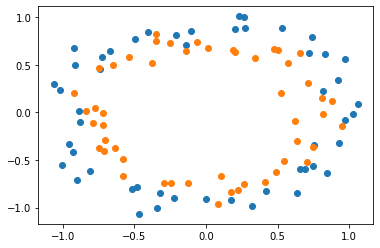

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 846ms/step - loss: 0.6982 - accuracy: 0.4333 - val_loss: 0.6971 - val_accuracy: 0.5429
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6948 - accuracy: 0.4333 - val_loss: 0.6986 - val_accuracy: 0.4857
Epoch 3/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6915 - accuracy: 0.5333 - val_loss: 0.7001 - val_accuracy: 0.4714
Epoch 4/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6885 - accuracy: 0.6333 - val_loss: 0.7018 - val_accuracy: 0.4571
Epoch 5/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6855 - accuracy: 0.6667 - val_loss: 0.7034 - val_accuracy: 0.4571
Epoch 6/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6827 - accuracy: 0.6333 - val_loss: 0.7051 - val_accuracy: 0.4714
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6801 - accuracy: 0.6667 - val_loss: 0.7068 - val_accuracy: 0.4571
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6052 - accuracy: 0.6667 - val_loss: 0.7639 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6041 - accuracy: 0.6667 - val_loss: 0.7639 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6030 - accuracy: 0.6667 - val_loss: 0.7640 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6020 - accuracy: 0.6667 - val_loss: 0.7640 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6009 - accuracy: 0.6667 - val_loss: 0.7641 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5998 - accuracy: 0.6667 - val_loss: 0.7641 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5987 - accuracy: 0.6667 - val_loss: 0.7642 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5420 - accuracy: 0.7333 - val_loss: 0.7524 - val_accuracy: 0.5000
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5409 - accuracy: 0.7333 - val_loss: 0.7516 - val_accuracy: 0.5000
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5397 - accuracy: 0.7333 - val_loss: 0.7508 - val_accuracy: 0.5000
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5385 - accuracy: 0.7333 - val_loss: 0.7500 - val_accuracy: 0.5000
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5373 - accuracy: 0.7333 - val_loss: 0.7493 - val_accuracy: 0.5000
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5361 - accuracy: 0.7333 - val_loss: 0.7485 - val_accuracy: 0.5000
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5349 - accuracy: 0.7333 - val_loss: 0.7477 - val_accuracy: 0.5000
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4694 - accuracy: 0.8000 - val_loss: 0.6956 - val_accuracy: 0.6000
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4682 - accuracy: 0.8000 - val_loss: 0.6946 - val_accuracy: 0.6000
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4670 - accuracy: 0.8000 - val_loss: 0.6935 - val_accuracy: 0.6000
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4657 - accuracy: 0.8000 - val_loss: 0.6925 - val_accuracy: 0.6000
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4645 - accuracy: 0.8000 - val_loss: 0.6915 - val_accuracy: 0.6000
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4633 - accuracy: 0.8000 - val_loss: 0.6904 - val_accuracy: 0.6000
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4620 - accuracy: 0.8000 - val_loss: 0.6895 - val_accuracy: 0.6000
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4002 - accuracy: 0.8333 - val_loss: 0.6260 - val_accuracy: 0.6571
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3990 - accuracy: 0.8333 - val_loss: 0.6247 - val_accuracy: 0.6571
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3979 - accuracy: 0.8333 - val_loss: 0.6234 - val_accuracy: 0.6571
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3967 - accuracy: 0.8333 - val_loss: 0.6220 - val_accuracy: 0.6571
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3955 - accuracy: 0.8333 - val_loss: 0.6206 - val_accuracy: 0.6571
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3944 - accuracy: 0.8333 - val_loss: 0.6192 - val_accuracy: 0.6571
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3932 - accuracy: 0.8333 - val_loss: 0.6179 - val_accuracy: 0.6571
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3369 - accuracy: 0.8667 - val_loss: 0.5544 - val_accuracy: 0.6857
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3358 - accuracy: 0.8667 - val_loss: 0.5533 - val_accuracy: 0.6857
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3348 - accuracy: 0.8667 - val_loss: 0.5523 - val_accuracy: 0.6857
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3338 - accuracy: 0.8667 - val_loss: 0.5512 - val_accuracy: 0.6857
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3327 - accuracy: 0.8667 - val_loss: 0.5500 - val_accuracy: 0.6857
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3317 - accuracy: 0.8667 - val_loss: 0.5487 - val_accuracy: 0.6857
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3307 - accuracy: 0.8667 - val_loss: 0.5475 - val_accuracy: 0.6857
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2821 - accuracy: 0.9333 - val_loss: 0.4971 - val_accuracy: 0.7286
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2811 - accuracy: 0.9333 - val_loss: 0.4963 - val_accuracy: 0.7286
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2803 - accuracy: 0.9333 - val_loss: 0.4955 - val_accuracy: 0.7286
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2794 - accuracy: 0.9333 - val_loss: 0.4948 - val_accuracy: 0.7286
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2784 - accuracy: 0.9333 - val_loss: 0.4940 - val_accuracy: 0.7286
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2776 - accuracy: 0.9333 - val_loss: 0.4931 - val_accuracy: 0.7143
Epoch 350/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2767 - accuracy: 0.9333 - val_loss: 0.4921 - val_accuracy: 0.7143
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2368 - accuracy: 0.9667 - val_loss: 0.4633 - val_accuracy: 0.7714
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2361 - accuracy: 0.9667 - val_loss: 0.4629 - val_accuracy: 0.7714
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2354 - accuracy: 0.9667 - val_loss: 0.4625 - val_accuracy: 0.7714
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2347 - accuracy: 0.9667 - val_loss: 0.4622 - val_accuracy: 0.7714
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2340 - accuracy: 0.9667 - val_loss: 0.4619 - val_accuracy: 0.7714
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2334 - accuracy: 0.9667 - val_loss: 0.4616 - val_accuracy: 0.7714
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2327 - accuracy: 0.9667 - val_loss: 0.4613 - val_accuracy: 0.7714
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2017 - accuracy: 0.9667 - val_loss: 0.4508 - val_accuracy: 0.7714
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2012 - accuracy: 0.9667 - val_loss: 0.4507 - val_accuracy: 0.7857
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2006 - accuracy: 0.9667 - val_loss: 0.4506 - val_accuracy: 0.7857
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2001 - accuracy: 0.9667 - val_loss: 0.4505 - val_accuracy: 0.7857
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1996 - accuracy: 0.9667 - val_loss: 0.4504 - val_accuracy: 0.7857
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1990 - accuracy: 0.9667 - val_loss: 0.4502 - val_accuracy: 0.7857
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1985 - accuracy: 0.9667 - val_loss: 0.4502 - val_accuracy: 0.7857
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1746 - accuracy: 0.9667 - val_loss: 0.4491 - val_accuracy: 0.8000
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1742 - accuracy: 0.9667 - val_loss: 0.4491 - val_accuracy: 0.8000
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1737 - accuracy: 0.9667 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1733 - accuracy: 0.9667 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 519/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1729 - accuracy: 0.9667 - val_loss: 0.4497 - val_accuracy: 0.8000
Epoch 520/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1725 - accuracy: 0.9667 - val_loss: 0.4497 - val_accuracy: 0.8000
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1721 - accuracy: 0.9667 - val_loss: 0.4498 - val_accuracy: 0.8000
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1536 - accuracy: 0.9667 - val_loss: 0.4560 - val_accuracy: 0.8000
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1533 - accuracy: 0.9667 - val_loss: 0.4560 - val_accuracy: 0.8000
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1529 - accuracy: 0.9667 - val_loss: 0.4561 - val_accuracy: 0.8000
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1526 - accuracy: 0.9667 - val_loss: 0.4563 - val_accuracy: 0.8000
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1523 - accuracy: 0.9667 - val_loss: 0.4565 - val_accuracy: 0.8000
Epoch 577/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1520 - accuracy: 0.9667 - val_loss: 0.4567 - val_accuracy: 0.8000
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1517 - accuracy: 0.9667 - val_loss: 0.4568 - val_accuracy: 0.8000
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1371 - accuracy: 0.9667 - val_loss: 0.4658 - val_accuracy: 0.8143
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1368 - accuracy: 0.9667 - val_loss: 0.4661 - val_accuracy: 0.8143
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1366 - accuracy: 0.9667 - val_loss: 0.4664 - val_accuracy: 0.8143
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1363 - accuracy: 0.9667 - val_loss: 0.4667 - val_accuracy: 0.8143
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1361 - accuracy: 0.9667 - val_loss: 0.4669 - val_accuracy: 0.8143
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 0.4670 - val_accuracy: 0.8143
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1356 - accuracy: 0.9667 - val_loss: 0.4671 - val_accuracy: 0.8143
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1239 - accuracy: 0.9667 - val_loss: 0.4798 - val_accuracy: 0.8286
Epoch 687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1237 - accuracy: 0.9667 - val_loss: 0.4802 - val_accuracy: 0.8286
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1235 - accuracy: 0.9667 - val_loss: 0.4805 - val_accuracy: 0.8286
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1233 - accuracy: 0.9667 - val_loss: 0.4808 - val_accuracy: 0.8286
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1231 - accuracy: 0.9667 - val_loss: 0.4809 - val_accuracy: 0.8286
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1229 - accuracy: 0.9667 - val_loss: 0.4811 - val_accuracy: 0.8286
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1227 - accuracy: 0.9667 - val_loss: 0.4814 - val_accuracy: 0.8286
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.4979 - val_accuracy: 0.8286
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1130 - accuracy: 0.9667 - val_loss: 0.4982 - val_accuracy: 0.8286
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 0.4986 - val_accuracy: 0.8286
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.4990 - val_accuracy: 0.8286
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.4994 - val_accuracy: 0.8286
Epoch 748/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 0.4998 - val_accuracy: 0.8286
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.5001 - val_accuracy: 0.8286
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1042 - accuracy: 0.9667 - val_loss: 0.5191 - val_accuracy: 0.8429
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1040 - accuracy: 0.9667 - val_loss: 0.5194 - val_accuracy: 0.8429
Epoch 802/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 0.5197 - val_accuracy: 0.8429
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1037 - accuracy: 0.9667 - val_loss: 0.5202 - val_accuracy: 0.8429
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1036 - accuracy: 0.9667 - val_loss: 0.5207 - val_accuracy: 0.8429
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.5211 - val_accuracy: 0.8429
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1033 - accuracy: 0.9667 - val_loss: 0.5216 - val_accuracy: 0.8429
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0963 - accuracy: 0.9667 - val_loss: 0.5411 - val_accuracy: 0.8286
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.5416 - val_accuracy: 0.8286
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0961 - accuracy: 0.9667 - val_loss: 0.5420 - val_accuracy: 0.8286
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.5424 - val_accuracy: 0.8286
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.5426 - val_accuracy: 0.8286
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0957 - accuracy: 0.9667 - val_loss: 0.5429 - val_accuracy: 0.8286
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0956 - accuracy: 0.9667 - val_loss: 0.5431 - val_accuracy: 0.8286
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0893 - accuracy: 0.9667 - val_loss: 0.5618 - val_accuracy: 0.8286
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0891 - accuracy: 0.9667 - val_loss: 0.5622 - val_accuracy: 0.8286
Epoch 916/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0890 - accuracy: 0.9667 - val_loss: 0.5625 - val_accuracy: 0.8286
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0889 - accuracy: 0.9667 - val_loss: 0.5627 - val_accuracy: 0.8286
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 0.5629 - val_accuracy: 0.8286
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0887 - accuracy: 0.9667 - val_loss: 0.5632 - val_accuracy: 0.8286
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 0.5637 - val_accuracy: 0.8286
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0825 - accuracy: 0.9667 - val_loss: 0.5820 - val_accuracy: 0.8286
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 0.5823 - val_accuracy: 0.8286
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.5826 - val_accuracy: 0.8286
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0822 - accuracy: 1.0000 - val_loss: 0.5831 - val_accuracy: 0.8286
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.5836 - val_accuracy: 0.8286
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.5841 - val_accuracy: 0.8286
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0819 - accuracy: 1.0000 - val_loss: 0.5847 - val_accuracy: 0.8286
Epoch 978/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0755 - accuracy: 1.0000 - val_loss: 0.6040 - val_accuracy: 0.8143
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0754 - accuracy: 1.0000 - val_loss: 0.6046 - val_accuracy: 0.8143
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0753 - accuracy: 1.0000 - val_loss: 0.6052 - val_accuracy: 0.8143
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0752 - accuracy: 1.0000 - val_loss: 0.6057 - val_accuracy: 0.8143
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0751 - accuracy: 1.0000 - val_loss: 0.6063 - val_accuracy: 0.8143
Epoch 1033/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 0.6067 - val_accuracy: 0.8143
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 0.6071 - val_accuracy: 0.8143
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.8000
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 0.6355 - val_accuracy: 0.8000
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0690 - accuracy: 1.0000 - val_loss: 0.6361 - val_accuracy: 0.8000
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0689 - accuracy: 1.0000 - val_loss: 0.6368 - val_accuracy: 0.8000
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.6375 - val_accuracy: 0.8000
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.6381 - val_accuracy: 0.8000
Epoch 1091/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0686 - accuracy: 1.0000 - val_loss: 0.6389 - val_accuracy: 0.8000
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 0.6682 - val_accuracy: 0.8000
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.6690 - val_accuracy: 0.8000
Epoch 1144/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0630 - accuracy: 1.0000 - val_loss: 0.6698 - val_accuracy: 0.8000
Epoch 1145/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0629 - accuracy: 1.0000 - val_loss: 0.6706 - val_accuracy: 0.8000
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8000
Epoch 1147/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 0.6719 - val_accuracy: 0.8000
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0625 - accuracy: 1.0000 - val_loss: 0.6724 - val_accuracy: 0.8000
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.7062 - val_accuracy: 0.8000
Epoch 1200/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.7069 - val_accuracy: 0.8000
Epoch 1201/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.7076 - val_accuracy: 0.8000
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8000
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0571 - accuracy: 1.0000 - val_loss: 0.7090 - val_accuracy: 0.8000
Epoch 1204/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0570 - accuracy: 1.0000 - val_loss: 0.7096 - val_accuracy: 0.8000
Epoch 1205/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 0.7102 - val_accuracy: 0.7857
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 0.7466 - val_accuracy: 0.7857
Epoch 1257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0523 - accuracy: 1.0000 - val_loss: 0.7475 - val_accuracy: 0.7857
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.7482 - val_accuracy: 0.7857
Epoch 1259/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.7488 - val_accuracy: 0.7857
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.7494 - val_accuracy: 0.7857
Epoch 1261/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.7500 - val_accuracy: 0.7857
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.7507 - val_accuracy: 0.7857
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 0.7876 - val_accuracy: 0.7857
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 0.7883 - val_accuracy: 0.7857
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0474 - accuracy: 1.0000 - val_loss: 0.7891 - val_accuracy: 0.7857
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.7896 - val_accuracy: 0.7857
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.7902 - val_accuracy: 0.7857
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 0.7908 - val_accuracy: 0.7857
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 0.7915 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.8286 - val_accuracy: 0.7857
Epoch 1371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 0.8292 - val_accuracy: 0.7857
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.8298 - val_accuracy: 0.7857
Epoch 1373/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.8306 - val_accuracy: 0.7857
Epoch 1374/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.8314 - val_accuracy: 0.7857
Epoch 1375/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 0.8322 - val_accuracy: 0.7857
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.8330 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0391 - accuracy: 1.0000 - val_loss: 0.8699 - val_accuracy: 0.7857
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.8707 - val_accuracy: 0.7857
Epoch 1429/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.8714 - val_accuracy: 0.7857
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 0.8720 - val_accuracy: 0.7857
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 0.8727 - val_accuracy: 0.7857
Epoch 1432/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 0.8734 - val_accuracy: 0.7857
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.8740 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.9104 - val_accuracy: 0.7857
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.9112 - val_accuracy: 0.7857
Epoch 1486/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.9120 - val_accuracy: 0.7857
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.9128 - val_accuracy: 0.7857
Epoch 1488/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.9135 - val_accuracy: 0.7857
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.9141 - val_accuracy: 0.7857
Epoch 1490/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.9147 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.9500 - val_accuracy: 0.7857
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.9508 - val_accuracy: 0.7857
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.9515 - val_accuracy: 0.7857
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.9523 - val_accuracy: 0.7857
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.9530 - val_accuracy: 0.7857
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.9535 - val_accuracy: 0.7857
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.9540 - val_accuracy: 0.7857
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.9883 - val_accuracy: 0.7857
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.9890 - val_accuracy: 0.7857
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.9896 - val_accuracy: 0.7857
Epoch 1601/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.9903 - val_accuracy: 0.7857
Epoch 1602/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.9908 - val_accuracy: 0.7857
Epoch 1603/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.9913 - val_accuracy: 0.7857
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.9918 - val_accuracy: 0.7857
Epoch 16

1/1 [==============================] - 0s 25ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.0247 - val_accuracy: 0.7857
Epoch 1656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0267 - accuracy: 1.0000 - val_loss: 1.0255 - val_accuracy: 0.7857
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0267 - accuracy: 1.0000 - val_loss: 1.0261 - val_accuracy: 0.7857
Epoch 1658/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.0267 - val_accuracy: 0.7857
Epoch 1659/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 1.0271 - val_accuracy: 0.7857
Epoch 1660/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.0276 - val_accuracy: 0.7857
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.0282 - val_accuracy: 0.7857
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 1.0599 - val_accuracy: 0.7857
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 1.0605 - val_accuracy: 0.7857
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.0610 - val_accuracy: 0.7857
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.0615 - val_accuracy: 0.7857
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 1.0618 - val_accuracy: 0.7857
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.0622 - val_accuracy: 0.7857
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 1.0628 - val_accuracy: 0.7857
Epoch 17

1/1 [==============================] - 0s 23ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.0937 - val_accuracy: 0.7857
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.0941 - val_accuracy: 0.7857
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.0946 - val_accuracy: 0.7857
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.0950 - val_accuracy: 0.7857
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.0954 - val_accuracy: 0.7857
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.0960 - val_accuracy: 0.7857
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.0968 - val_accuracy: 0.7857
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 1.1260 - val_accuracy: 0.7857
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 1.1265 - val_accuracy: 0.7857
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 1.1270 - val_accuracy: 0.7857
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.1275 - val_accuracy: 0.7857
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.1280 - val_accuracy: 0.7857
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.1287 - val_accuracy: 0.7857
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.1293 - val_accuracy: 0.7857
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 1.1572 - val_accuracy: 0.7857
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 1.1575 - val_accuracy: 0.7857
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 1.1581 - val_accuracy: 0.7857
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 1.1587 - val_accuracy: 0.7857
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 1.1593 - val_accuracy: 0.7857
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 1.1600 - val_accuracy: 0.7857
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 1.1607 - val_accuracy: 0.7857
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 1.1875 - val_accuracy: 0.7857
Epoch 1941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 1.1881 - val_accuracy: 0.7857
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.1886 - val_accuracy: 0.7857
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.1892 - val_accuracy: 0.7857
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.1898 - val_accuracy: 0.7857
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.1904 - val_accuracy: 0.7857
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 0.7857
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.2167 - val_accuracy: 0.7857
Epoch 1998/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.2172 - val_accuracy: 0.7857
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.2178 - val_accuracy: 0.7857
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2185 - val_accuracy: 0.7857
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2191 - val_accuracy: 0.7857
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2197 - val_accuracy: 0.7857
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2203 - val_accuracy: 0.7857
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2455 - val_accuracy: 0.7857
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2460 - val_accuracy: 0.7857
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2466 - val_accuracy: 0.7857
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2472 - val_accuracy: 0.7857
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.2478 - val_accuracy: 0.7857
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.2484 - val_accuracy: 0.7857
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.2490 - val_accuracy: 0.7857
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.2737 - val_accuracy: 0.7857
Epoch 2112/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.2741 - val_accuracy: 0.7857
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.2748 - val_accuracy: 0.7857
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.2755 - val_accuracy: 0.7857
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.2763 - val_accuracy: 0.7857
Epoch 2116/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.2770 - val_accuracy: 0.7857
Epoch 2117/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.2776 - val_accuracy: 0.7857
Epoch 21

1/1 [==============================] - 0s 23ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3014 - val_accuracy: 0.7857
Epoch 2169/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3020 - val_accuracy: 0.7857
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3026 - val_accuracy: 0.7857
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3033 - val_accuracy: 0.7857
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3041 - val_accuracy: 0.7857
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3047 - val_accuracy: 0.7857
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3052 - val_accuracy: 0.7857
Epoch 21

1/1 [==============================] - 0s 24ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.3289 - val_accuracy: 0.7857
Epoch 2226/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3293 - val_accuracy: 0.7857
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3298 - val_accuracy: 0.7857
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3304 - val_accuracy: 0.7857
Epoch 2229/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3310 - val_accuracy: 0.7857
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3315 - val_accuracy: 0.7857
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.3320 - val_accuracy: 0.7857
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3553 - val_accuracy: 0.7857
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3559 - val_accuracy: 0.7857
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3565 - val_accuracy: 0.7857
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3572 - val_accuracy: 0.7857
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.3580 - val_accuracy: 0.7857
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.3588 - val_accuracy: 0.7857
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.3594 - val_accuracy: 0.7857
Epoch 22

1/1 [==============================] - 0s 23ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3821 - val_accuracy: 0.7857
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3825 - val_accuracy: 0.7857
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3830 - val_accuracy: 0.7857
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3835 - val_accuracy: 0.7857
Epoch 2343/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3841 - val_accuracy: 0.7857
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3846 - val_accuracy: 0.7857
Epoch 2345/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3852 - val_accuracy: 0.7857
Epoch 23

1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4077 - val_accuracy: 0.7714
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4079 - val_accuracy: 0.7714
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4082 - val_accuracy: 0.7714
Epoch 2399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4086 - val_accuracy: 0.7714
Epoch 2400/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4092 - val_accuracy: 0.7714
Epoch 2401/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4099 - val_accuracy: 0.7714
Epoch 2402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.4106 - val_accuracy: 0.7714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.4324 - val_accuracy: 0.7714
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.7714
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.4331 - val_accuracy: 0.7714
Epoch 2456/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.4335 - val_accuracy: 0.7714
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.4339 - val_accuracy: 0.7714
Epoch 2458/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.4345 - val_accuracy: 0.7714
Epoch 2459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.4351 - val_accuracy: 0.7714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4568 - val_accuracy: 0.7714
Epoch 2511/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4571 - val_accuracy: 0.7714
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4574 - val_accuracy: 0.7714
Epoch 2513/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4578 - val_accuracy: 0.7714
Epoch 2514/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4583 - val_accuracy: 0.7714
Epoch 2515/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.4589 - val_accuracy: 0.7714
Epoch 2516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.4595 - val_accuracy: 0.7714
Epoch 25

1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.4812 - val_accuracy: 0.7714
Epoch 2568/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.4815 - val_accuracy: 0.7714
Epoch 2569/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4818 - val_accuracy: 0.7714
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4822 - val_accuracy: 0.7714
Epoch 2571/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4826 - val_accuracy: 0.7714
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4831 - val_accuracy: 0.7714
Epoch 2573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4836 - val_accuracy: 0.7714
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.5056 - val_accuracy: 0.7714
Epoch 2625/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.5060 - val_accuracy: 0.7714
Epoch 2626/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.5064 - val_accuracy: 0.7714
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.5069 - val_accuracy: 0.7714
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.5075 - val_accuracy: 0.7714
Epoch 2629/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.5081 - val_accuracy: 0.7714
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.5086 - val_accuracy: 0.7714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5297 - val_accuracy: 0.7714
Epoch 2682/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5301 - val_accuracy: 0.7714
Epoch 2683/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5306 - val_accuracy: 0.7714
Epoch 2684/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5311 - val_accuracy: 0.7714
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.7714
Epoch 2686/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5320 - val_accuracy: 0.7714
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.5324 - val_accuracy: 0.7714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5532 - val_accuracy: 0.7714
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5537 - val_accuracy: 0.7714
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5543 - val_accuracy: 0.7714
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5548 - val_accuracy: 0.7714
Epoch 2742/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5553 - val_accuracy: 0.7714
Epoch 2743/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5557 - val_accuracy: 0.7714
Epoch 2744/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5561 - val_accuracy: 0.7714
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5767 - val_accuracy: 0.7714
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5772 - val_accuracy: 0.7714
Epoch 2797/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5777 - val_accuracy: 0.7714
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5781 - val_accuracy: 0.7714
Epoch 2799/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5785 - val_accuracy: 0.7714
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5788 - val_accuracy: 0.7714
Epoch 2801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5792 - val_accuracy: 0.7714
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.5996 - val_accuracy: 0.7714
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.6000 - val_accuracy: 0.7714
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.6005 - val_accuracy: 0.7714
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.6012 - val_accuracy: 0.7714
Epoch 2856/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.6017 - val_accuracy: 0.7714
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.6021 - val_accuracy: 0.7714
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.6025 - val_accuracy: 0.7714
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.6228 - val_accuracy: 0.7714
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6232 - val_accuracy: 0.7714
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6236 - val_accuracy: 0.7714
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6239 - val_accuracy: 0.7714
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6243 - val_accuracy: 0.7714
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6248 - val_accuracy: 0.7714
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.6252 - val_accuracy: 0.7714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.6448 - val_accuracy: 0.7714
Epoch 2967/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6451 - val_accuracy: 0.7714
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6454 - val_accuracy: 0.7714
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6458 - val_accuracy: 0.7714
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6462 - val_accuracy: 0.7714
Epoch 2971/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6466 - val_accuracy: 0.7714
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6469 - val_accuracy: 0.7714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6664 - val_accuracy: 0.7714
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6668 - val_accuracy: 0.7714
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6671 - val_accuracy: 0.7714
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6673 - val_accuracy: 0.7714
Epoch 3027/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6676 - val_accuracy: 0.7714
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6680 - val_accuracy: 0.7714
Epoch 3029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.6684 - val_accuracy: 0.7714
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6869 - val_accuracy: 0.7714
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6873 - val_accuracy: 0.7714
Epoch 3082/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6877 - val_accuracy: 0.7714
Epoch 3083/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6880 - val_accuracy: 0.7714
Epoch 3084/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6885 - val_accuracy: 0.7714
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6889 - val_accuracy: 0.7714
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.6893 - val_accuracy: 0.7714
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7077 - val_accuracy: 0.7714
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7081 - val_accuracy: 0.7714
Epoch 3139/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7086 - val_accuracy: 0.7714
Epoch 3140/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7091 - val_accuracy: 0.7714
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7095 - val_accuracy: 0.7714
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7099 - val_accuracy: 0.7714
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7103 - val_accuracy: 0.7714
Epoch 31

1/1 [==============================] - 0s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7276 - val_accuracy: 0.7714
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7280 - val_accuracy: 0.7714
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7285 - val_accuracy: 0.7714
Epoch 3197/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7290 - val_accuracy: 0.7714
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7295 - val_accuracy: 0.7714
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7298 - val_accuracy: 0.7714
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7301 - val_accuracy: 0.7714
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.7473 - val_accuracy: 0.7714
Epoch 3252/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7477 - val_accuracy: 0.7714
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7482 - val_accuracy: 0.7714
Epoch 3254/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7487 - val_accuracy: 0.7714
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7490 - val_accuracy: 0.7714
Epoch 3256/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7493 - val_accuracy: 0.7714
Epoch 3257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.7495 - val_accuracy: 0.7714
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7670 - val_accuracy: 0.7714
Epoch 3309/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7675 - val_accuracy: 0.7714
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.7680 - val_accuracy: 0.7714
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.7685 - val_accuracy: 0.7714
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.7689 - val_accuracy: 0.7714
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.7692 - val_accuracy: 0.7714
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.7694 - val_accuracy: 0.7714
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7862 - val_accuracy: 0.7714
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7867 - val_accuracy: 0.7714
Epoch 3367/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7873 - val_accuracy: 0.7714
Epoch 3368/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7877 - val_accuracy: 0.7714
Epoch 3369/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7880 - val_accuracy: 0.7714
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7882 - val_accuracy: 0.7714
Epoch 3371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7883 - val_accuracy: 0.7714
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8052 - val_accuracy: 0.7714
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8057 - val_accuracy: 0.7714
Epoch 3424/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8061 - val_accuracy: 0.7714
Epoch 3425/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8065 - val_accuracy: 0.7714
Epoch 3426/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8068 - val_accuracy: 0.7714
Epoch 3427/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8068 - val_accuracy: 0.7714
Epoch 3428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.8070 - val_accuracy: 0.7714
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.8239 - val_accuracy: 0.7714
Epoch 3480/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.8243 - val_accuracy: 0.7714
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.8246 - val_accuracy: 0.7714
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8249 - val_accuracy: 0.7714
Epoch 3483/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8251 - val_accuracy: 0.7714
Epoch 3484/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8254 - val_accuracy: 0.7714
Epoch 3485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8257 - val_accuracy: 0.7714
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8428 - val_accuracy: 0.7714
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8432 - val_accuracy: 0.7714
Epoch 3538/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8435 - val_accuracy: 0.7714
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8437 - val_accuracy: 0.7714
Epoch 3540/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8440 - val_accuracy: 0.7714
Epoch 3541/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8442 - val_accuracy: 0.7714
Epoch 3542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.8445 - val_accuracy: 0.7714
Epoch 35

1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8609 - val_accuracy: 0.7571
Epoch 3594/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8611 - val_accuracy: 0.7571
Epoch 3595/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8613 - val_accuracy: 0.7571
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8616 - val_accuracy: 0.7571
Epoch 3597/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8619 - val_accuracy: 0.7571
Epoch 3598/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8622 - val_accuracy: 0.7571
Epoch 3599/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.8626 - val_accuracy: 0.7571
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8787 - val_accuracy: 0.7714
Epoch 3651/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8790 - val_accuracy: 0.7714
Epoch 3652/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8793 - val_accuracy: 0.7714
Epoch 3653/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8795 - val_accuracy: 0.7714
Epoch 3654/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8798 - val_accuracy: 0.7714
Epoch 3655/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8802 - val_accuracy: 0.7714
Epoch 3656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8805 - val_accuracy: 0.7714
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8962 - val_accuracy: 0.7714
Epoch 3708/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8966 - val_accuracy: 0.7714
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8969 - val_accuracy: 0.7714
Epoch 3710/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8972 - val_accuracy: 0.7714
Epoch 3711/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8976 - val_accuracy: 0.7714
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8978 - val_accuracy: 0.7714
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8981 - val_accuracy: 0.7714
Epoch 37

1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9140 - val_accuracy: 0.7714
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9143 - val_accuracy: 0.7714
Epoch 3766/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9147 - val_accuracy: 0.7714
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9150 - val_accuracy: 0.7714
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9152 - val_accuracy: 0.7714
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9155 - val_accuracy: 0.7714
Epoch 3770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.9160 - val_accuracy: 0.7714
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9314 - val_accuracy: 0.7714
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9317 - val_accuracy: 0.7714
Epoch 3823/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9320 - val_accuracy: 0.7714
Epoch 3824/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9322 - val_accuracy: 0.7714
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9325 - val_accuracy: 0.7714
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9329 - val_accuracy: 0.7714
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9332 - val_accuracy: 0.7714
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9484 - val_accuracy: 0.7714
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9485 - val_accuracy: 0.7714
Epoch 3880/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9488 - val_accuracy: 0.7714
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9491 - val_accuracy: 0.7714
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9495 - val_accuracy: 0.7714
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9499 - val_accuracy: 0.7714
Epoch 3884/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9502 - val_accuracy: 0.7714
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9654 - val_accuracy: 0.7714
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9656 - val_accuracy: 0.7714
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9658 - val_accuracy: 0.7714
Epoch 3938/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9660 - val_accuracy: 0.7714
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9663 - val_accuracy: 0.7714
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9668 - val_accuracy: 0.7714
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9672 - val_accuracy: 0.7714
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9829 - val_accuracy: 0.7714
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9831 - val_accuracy: 0.7714
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9833 - val_accuracy: 0.7714
Epoch 3995/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9834 - val_accuracy: 0.7714
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9836 - val_accuracy: 0.7714
Epoch 3997/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9839 - val_accuracy: 0.7714
Epoch 3998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9841 - val_accuracy: 0.7714
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


Finally, we will plot the performance of the model on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of loss and accuracy on the training set to continue to improve. The test set will start to get worse once the model learns statistical noise in the training dataset.

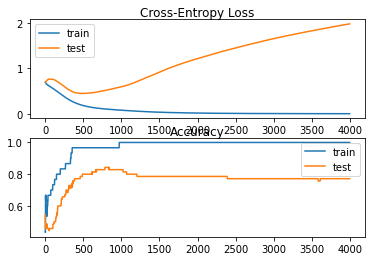

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.757


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

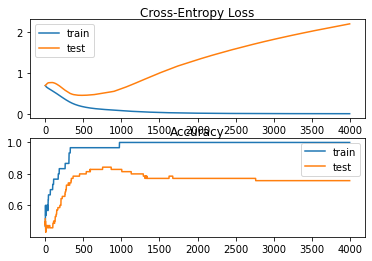

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP With Dropout Regularization

We can update the example to use dropout regularization, and we can insert a new Dropout layer between the hidden and the output layers. In this case, we will specify a dropout rate (probability of setting outputs from the hidden layer to zero) to 40% or 0.4.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The complete updated example with the addition of dropout after the hidden layer is listed below:

In [14]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.771


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this specific case, we can see that dropout resulted in a slight drop in accuracy on the training dataset, down from 100% to 96%, and a lift in the accuracy on the test set, up from 77% to 81%.

Reviewing the line plot of train and test accuracy during training, we can see that it no longer appears that the model has overfitted the training dataset. Model accuracy on both the train and test sets continues to increase to a plateau, albeit with much noise given the use of dropout during training.

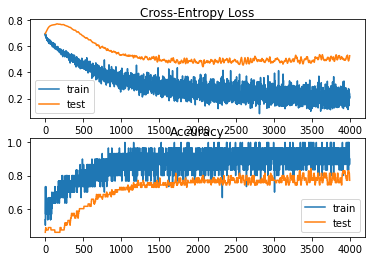

In [15]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Input Dropout**. Update the example to use dropout on the input variables and compare results.
* **Weight Constraint**. Update the example to add a max-norm weight constraint to the hidden layer and compare results.
* **Repeated Evaluation**. Update the example to repeat the evaluation of the overfit and dropout model and summarize and compare the average results.
* **Grid Search Rate**. Develop a grid search of dropout probabilities and report the relationship between dropout rate and test set accuracy.

## Summary

In this tutorial, you discovered dropout regularization to reduce overfitting and improve the generalization of deep neural networks. Specifically, you learned:

* Large weights in a neural network signify a more complex network that has overfit the training data.
* Probabilistically dropping out nodes in the network is a simple and effective regularization method.
* A large network with more training epochs and the use of a weight constraint is suggested when using dropout.